In [1]:
import pandas as pd
data = pd.read_csv("C:\\Users\\olake\\Desktop\\PROJETS_CAS_ENTREPRISE\\PROJET_1\\data\\donnees_nettoy\\books_review_nettoyees.csv")

## VECTORISATION

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=300, ngram_range=(1,2), stop_words='english')
X = vectorizer.fit_transform(data["cleaned_title"])
X.shape
y = data["sentiment"]

## SEPARATION ENTRAINEMENT/TEST

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) 

# MODELE

### REGRESSION LOGISTIQUE

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

modele = LogisticRegression()
modele.fit(X_train, y_train)

y_pred = modele.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.31      0.62      0.42         8
     neutral       0.00      0.00      0.00         5
    positive       0.25      0.14      0.18         7

    accuracy                           0.30        20
   macro avg       0.19      0.26      0.20        20
weighted avg       0.21      0.30      0.23        20



c:\Users\olake\Desktop\PROJETS_CAS_ENTREPRISE\PROJET_1\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\olake\Desktop\PROJETS_CAS_ENTREPRISE\PROJET_1\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\olake\Desktop\PROJETS_CAS_ENTREPRISE\PROJET_1\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


## SVM

In [5]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

modele_svc = LinearSVC()
modele_svc.fit(X_train, y_train)

y_pred_svm = modele_svc.predict(X_test)

print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

    negative       0.31      0.62      0.42         8
     neutral       0.00      0.00      0.00         5
    positive       0.33      0.14      0.20         7

    accuracy                           0.30        20
   macro avg       0.22      0.26      0.21        20
weighted avg       0.24      0.30      0.24        20



# ANALYSE THEMATIQUE

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

data['cluster'] = clusters
data[['cleaned_title', 'cluster']].head()

,cleaned_title,cluster
0,a light in the attic,1
1,tipping the velvet,1
2,soumission,1
3,sharp objects,1
4,sapiens a brief history of humankind,1


In [8]:
terms = vectorizer.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

for i in range(3):
    print(f"Cluster {i}:")
    for ind in order_centroids[i, :10]:
        print(f" {terms[ind]}")
    print()

Cluster 0:
 dark
 wood
 dark wood
 dark dark
 workbook anxiety
 workbook
 woodhull
 wonders urban
 wonders
 wonderful lamp

Cluster 1:
 lumberjanes
 black
 world
 guide
 art
 vol
 paris
 poems
 beginners
 story

Cluster 2:
 life
 scott
 woman
 indie
 indie underground
 american indie
 american
 free soul
 higherselfie wake
 higherselfie



In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [10]:
def plot_wordcloud(df, cluster_label):
    text = " ".join(df[df['cluster'] == cluster_label]['cleaned_title'])
    wordcloud = WordCloud(width=800, height=400, stopwords=ENGLISH_STOP_WORDS, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud pour le Cluster {cluster_label}')
    plt.show()

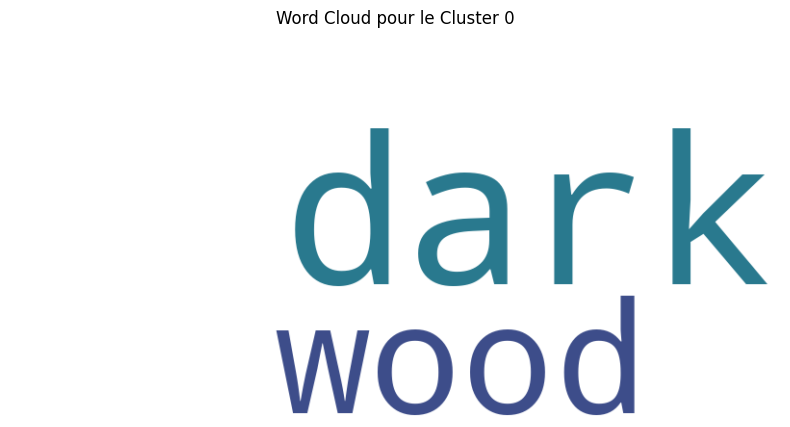

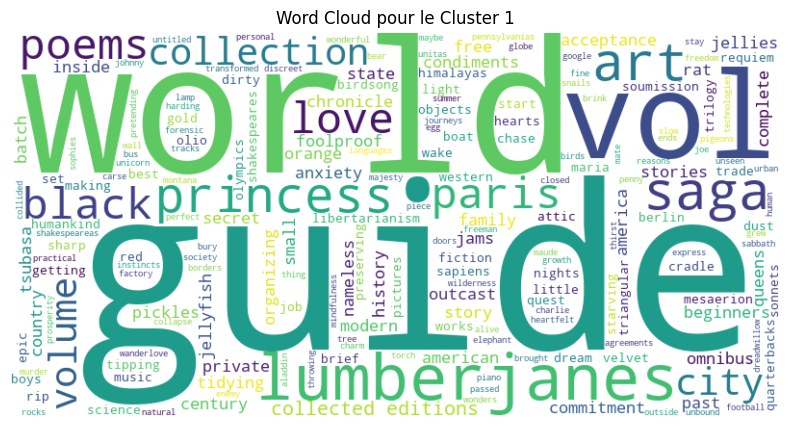

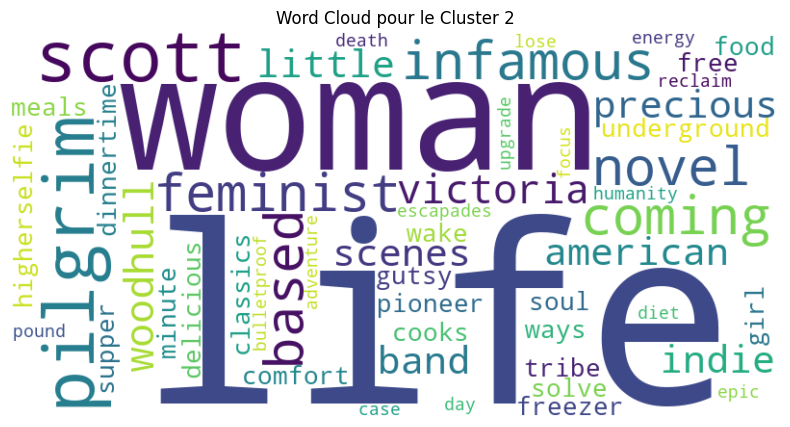

In [11]:
for cluster in sorted(data['cluster'].unique()):
    plot_wordcloud(data, cluster)